# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Gabriel Richards

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [1]:
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import requests
import spacy
from textblob import TextBlob


# URL of the article
url = "https://trainmuseum.org/exhibits/the-railroad-changed-everything/"

# Send GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Open a file in write mode with UTF-8 encoding
    with open('train_history_article.html', 'w', encoding='utf-8') as file:
        # Write the HTML content to the file
        file.write(response.text)
    print("Article HTML has been successfully saved to 'train_history_article.html'")
else:
    print(f"Failed to fetch the article. Status code: {response.status_code}")


Article HTML has been successfully saved to 'train_history_article.html'


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [2]:

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Read the HTML file
with open('train_history_article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Create BeautifulSoup object
soup = BeautifulSoup(html_content, 'html.parser')

# Remove common UI elements
for element in soup.find_all(['nav', 'header', 'footer', 'script', 'style', 'button', 'form']):
    element.decompose()

# Get the article text and clean it up
article_text = soup.get_text()

# Clean up the text by removing extra whitespace and newlines
cleaned_text = ' '.join(article_text.split())

# Process with spaCy
doc = nlp(cleaned_text)

# Filter out UI/navigation text and very short sentences
filtered_sentences = []
for sent in doc.sents:
    text = sent.text.strip()
    # Skip sentences that look like navigation/UI elements
    if any(skip in text.lower() for skip in [
            # Original items
            'menu', 'search', 'facebook', 'instagram',
            'privacy policy', 'accessibility', 'skip to content',
            'contact', 'donate', 'buy', 'museum', 'shop', 'blog',
            # Additional UI elements
            'ticket', 'close', 'enter to', 'esc to', 
            'back to', 'exhibit hall', 'online now',
            # Footer/contact items
            'address', 'phone', 'email',
            # Navigation items
            'visit', 'events', 'programs', 'support', 'learn',
            # Social proof/legal
            'copyright', 'permission', 'follow us'
        ]):
        continue
    # Skip very short sentences
    if len(sent) < 3:
        continue
    filtered_sentences.append(text)

# Create TextBlob object for sentiment analysis
blob = TextBlob(' '.join(filtered_sentences))

# Get polarity score
polarity = blob.sentiment.polarity

# Count sentences
sentence_count = len(filtered_sentences)

# Print results
print(f"Sentiment Polarity Score: {polarity:.2f}")
print(f"Number of sentences in the article: {sentence_count}")

Sentiment Polarity Score: 0.14
Number of sentences in the article: 76


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [3]:

nlp = spacy.load('en_core_web_sm')



# Create a list of tokens, excluding punctuation and whitespace
tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]

# Count token frequencies
token_freq = Counter(tokens)

# Get the 5 most common tokens
most_common = token_freq.most_common(5)

# Print results
print("Five Most Common Tokens:")
for token, freq in most_common:
    print(f"Token: '{token}' - Frequency: {freq}")
    

Five Most Common Tokens:
Token: 'the' - Frequency: 111
Token: 'of' - Frequency: 42
Token: 'and' - Frequency: 41
Token: 'to' - Frequency: 40
Token: 'a' - Frequency: 24


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [4]:
# Create a list of lemmas, excluding punctuation and whitespace
lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space]

# Count lemma frequencies
lemma_freq = Counter(lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Print results
print("Five Most Common Lemmas:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}' - Frequency: {freq}")

Five Most Common Lemmas:
Lemma: 'the' - Frequency: 111
Lemma: 'be' - Frequency: 47
Lemma: 'of' - Frequency: 42
Lemma: 'and' - Frequency: 41
Lemma: 'to' - Frequency: 40


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

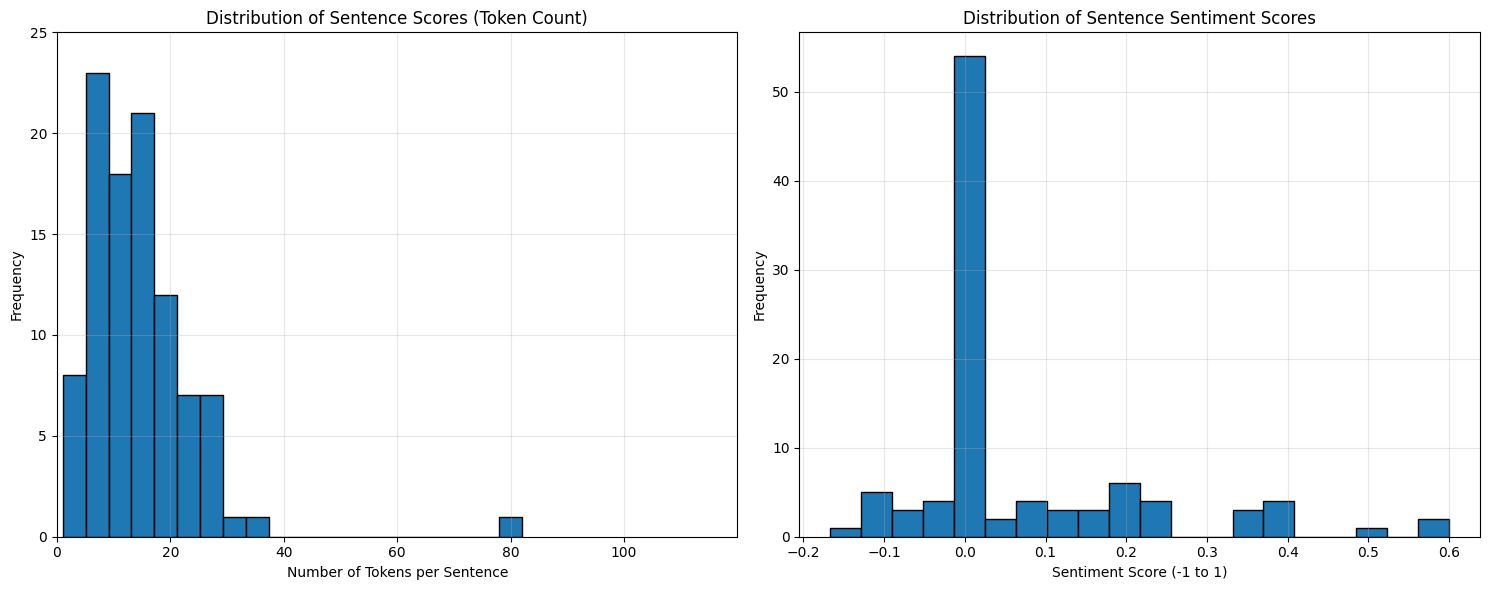

Token Statistics:
Minimum score: 1
Maximum score: 82
Average score: 14.86

Sentiment Statistics:
Minimum sentiment: -0.17
Maximum sentiment: 0.60
Average sentiment: 0.07


In [5]:
# Calculate sentence scores (using token counts) and sentiment scores
sentence_scores = []
sentiment_scores = []

for sent in doc.sents:
    # Calculate token score
    score = len([token for token in sent if not token.is_punct and not token.is_space])
    sentence_scores.append(score)
    
    # Calculate sentiment score
    sentiment = TextBlob(sent.text).sentiment.polarity
    sentiment_scores.append(sentiment)

# Create figure with two subplots
plt.figure(figsize=(15, 6))

# First subplot - Token counts
plt.subplot(1, 2, 1)
plt.hist(sentence_scores, bins=20, edgecolor='black')
plt.title('Distribution of Sentence Scores (Token Count)')
plt.xlabel('Number of Tokens per Sentence')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Set axis ticks
plt.xticks(np.arange(0, 120, 20))
plt.yticks(np.arange(0, 30, 5))
plt.xlim(0, 120)

# Second subplot - Sentiment scores
plt.subplot(1, 2, 2)
plt.hist(sentiment_scores, bins=20, edgecolor='black')
plt.title('Distribution of Sentence Sentiment Scores')
plt.xlabel('Sentiment Score (-1 to 1)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print basic statistics for both distributions
print(f"Token Statistics:")
print(f"Minimum score: {min(sentence_scores)}")
print(f"Maximum score: {max(sentence_scores)}")
print(f"Average score: {sum(sentence_scores)/len(sentence_scores):.2f}")

print(f"\nSentiment Statistics:")
print(f"Minimum sentiment: {min(sentiment_scores):.2f}")
print(f"Maximum sentiment: {max(sentiment_scores):.2f}")
print(f"Average sentiment: {sum(sentiment_scores)/len(sentiment_scores):.2f}")

# Most common range is close to 0

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

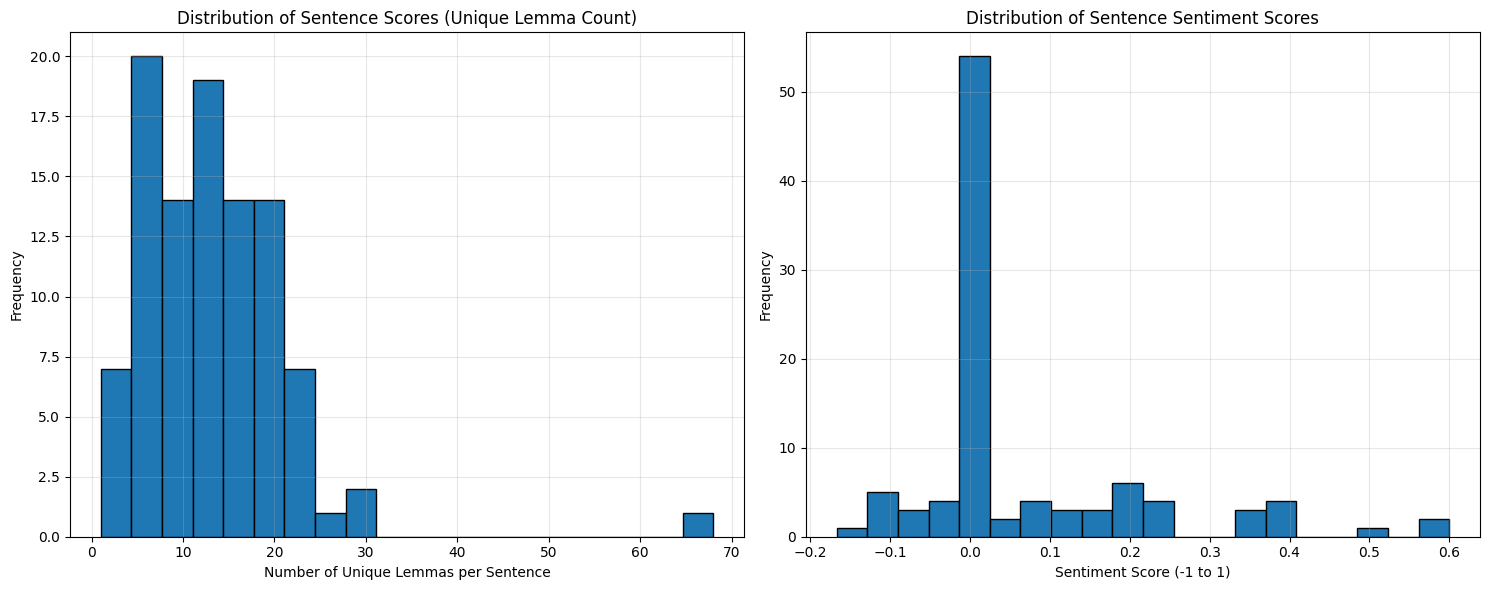


Most frequent bin range: 4.3-7.7

Lemma Statistics:
Minimum score: 1
Maximum score: 68
Average score: 13.44

Sentiment Statistics:
Minimum sentiment: -0.17
Maximum sentiment: 0.60
Average sentiment: 0.07


In [6]:
# Create lists for lemma scores and sentiment scores
sentence_scores_lemmas = []
sentiment_scores = []

for sent in doc.sents:
    # Count unique lemmas
    lemmas = set(token.lemma_.lower() for token in sent 
                 if not token.is_punct and not token.is_space)
    sentence_scores_lemmas.append(len(lemmas))
    
    # Calculate sentiment score
    sentiment = TextBlob(sent.text).sentiment.polarity
    sentiment_scores.append(sentiment)

# Create figure with two subplots
plt.figure(figsize=(15, 6))

# First subplot - Lemma counts
plt.subplot(1, 2, 1)
counts, bins, _ = plt.hist(sentence_scores_lemmas, bins=20, edgecolor='black')
plt.title('Distribution of Sentence Scores (Unique Lemma Count)')
plt.xlabel('Number of Unique Lemmas per Sentence')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Second subplot - Sentiment scores
plt.subplot(1, 2, 2)
plt.hist(sentiment_scores, bins=20, edgecolor='black')
plt.title('Distribution of Sentence Sentiment Scores')
plt.xlabel('Sentiment Score (-1 to 1)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find most frequent lemma bin range
max_count_idx = np.argmax(counts)
bin_start = bins[max_count_idx]
bin_end = bins[max_count_idx + 1]
print(f"\nMost frequent bin range: {bin_start:.1f}-{bin_end:.1f}")

# Print statistics for both distributions
print(f"\nLemma Statistics:")
print(f"Minimum score: {min(sentence_scores_lemmas)}")
print(f"Maximum score: {max(sentence_scores_lemmas)}")
print(f"Average score: {sum(sentence_scores_lemmas)/len(sentence_scores_lemmas):.2f}")

print(f"\nSentiment Statistics:")
print(f"Minimum sentiment: {min(sentiment_scores):.2f}")
print(f"Maximum sentiment: {max(sentiment_scores):.2f}")
print(f"Average sentiment: {sum(sentiment_scores)/len(sentiment_scores):.2f}")

# The most common range is close to 0

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): -0.05
* Cutoff Score (lemmas): -0.05

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [7]:
# Initialize empty list for summary sentences
summary_sentences = []

# Create TextBlob for sentiment analysis
from textblob import TextBlob

# Process each sentence
for sent in doc.sents:
    # Get sentiment score
    sentiment = TextBlob(sent.text).sentiment.polarity
    
    # Calculate token score
    score = len([token for token in sent if not token.is_punct and not token.is_space])
    
    # Add sentences that meet criteria sentiment <= 0
    if sentiment <= -0.05:
        summary_sentences.append(sent.text.strip())

# Join sentences and print summary
summary = '\n'.join(summary_sentences)
print(summary)

The journey west ~ 2,400 miles and 4-8 months ~ was reduced to a mere week or two following the completion of the first transcontinental railroad.
The endeavor was supported and partially subsidized (land grants + money) by the government, which saw the advantage of swift transcontinental commerce.
Other railroads and connections followed later.
Selling the land along its route was an important part of construction and sustainability because building railroads was expensive!
Typical cedar plank construction of native dwellings.
Animals were used to drag the cut trees to the river or lake.
Snoqualmie Valley Museum PO-40-264 Hand cutting a huge tree, Kinsey image, 1906.
Passengers spent the day at the Falls and the return train departed at 6 pm.
By visiting, visitors grant the Museum permission to use photographs and/or audiovisual recordings in which visitors appear for archival, documentary, publicity, advertising, or other purposes.


9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [8]:
# Get the summary text from the last cell
summary_text = '\n'.join(summary_sentences)

# Create TextBlob object for sentiment analysis
summary_blob = TextBlob(summary_text)

# Get polarity score and sentence count
polarity = summary_blob.sentiment.polarity
sentence_count = len(summary_sentences)

# Print results with labels
print(f"Token Summary Sentiment Polarity Score: {polarity:.2f}")
print(f"Number of sentences in the Token summary: {sentence_count}")

Token Summary Sentiment Polarity Score: -0.09
Number of sentences in the Token summary: 9


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [9]:
# Initialize empty list for summary sentences
lemma_summary_sentences = []

# Create TextBlob for sentiment analysis
from textblob import TextBlob

# Process each sentence 
for sent in doc.sents:
   # Get sentiment score
   sentiment = TextBlob(sent.text).sentiment.polarity
   
   # Get unique lemmas
   lemmas = set(token.lemma_.lower() for token in sent 
                if not token.is_punct and not token.is_space)
   
   # Calculate lemma score
   score = len(lemmas)
   
   # Add sentences with high lemma count and negative sentiment
   if sentiment <= -0.05:
       lemma_summary_sentences.append(sent.text.strip())

# Join sentences and print summary        
lemma_summary = '\n'.join(lemma_summary_sentences)
print(lemma_summary)

The journey west ~ 2,400 miles and 4-8 months ~ was reduced to a mere week or two following the completion of the first transcontinental railroad.
The endeavor was supported and partially subsidized (land grants + money) by the government, which saw the advantage of swift transcontinental commerce.
Other railroads and connections followed later.
Selling the land along its route was an important part of construction and sustainability because building railroads was expensive!
Typical cedar plank construction of native dwellings.
Animals were used to drag the cut trees to the river or lake.
Snoqualmie Valley Museum PO-40-264 Hand cutting a huge tree, Kinsey image, 1906.
Passengers spent the day at the Falls and the return train departed at 6 pm.
By visiting, visitors grant the Museum permission to use photographs and/or audiovisual recordings in which visitors appear for archival, documentary, publicity, advertising, or other purposes.


11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [10]:
# Get the summary text from the last cell
lemma_summary_text = '\n'.join(lemma_summary_sentences)

# Create TextBlob object for sentiment analysis
lemma_summary_blob = TextBlob(lemma_summary_text)

# Get polarity score and sentence count
lemma_polarity = lemma_summary_blob.sentiment.polarity
lemma_sentence_count = len(lemma_summary_sentences)

# Print results with labels
print(f"Lemma-Based Summary Sentiment Polarity Score: {lemma_polarity:.2f}")
print(f"Number of sentences in the lemma-based summary: {lemma_sentence_count}")


Lemma-Based Summary Sentiment Polarity Score: -0.09
Number of sentences in the lemma-based summary: 9


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?  Answer in this Markdown cell.  

By specifically selecting sentences with negative sentiment (≤ -0.05), we've created summaries that naturally skew more negative than the original text. This demonstrates how sentiment-based filtering can dramatically alter the emotional tone of a summary, potentially creating a more critical or negative perspective of the railroad's impact compared to the balanced view in the original article.

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

The two generated the exact same summary. This is most-likely due to their similar criteria of a -0.05 score. Additionally, Railroads are a generally neutral, factual topic which do not lend themselves towards strong positive or negative sentiments.